In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('diabetes.csv')

In [41]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
!pip install scikit-learn



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
# convert datas to value between 0 to 1
from sklearn.preprocessing import MinMaxScaler
MM_scaler = MinMaxScaler()

In [45]:
df['chol'] = MM_scaler.fit_transform(df[['chol']])

KeyError: "None of [Index(['chol'], dtype='object')] are in the [columns]"

In [43]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
df['chol'].min()

0.0

In [20]:
df['chol'].max()

0.9999999999999998

In [21]:
df['chol'].mean()

0.273972602739726

In [27]:
# convert mean and std value to 0 and 1
from sklearn.preprocessing import StandardScaler
ss_scaler = StandardScaler()

In [23]:
df['chol'] = ss_scaler.fit_transform(df[['chol']])

In [24]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,-0.659332,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,-0.833861,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,-1.396233,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,-0.833861,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,0.930822,1,1,106,0,1.9,1,3,2,0


In [25]:
df['chol'].mean()

-2.7728497005272202e-17

In [26]:
df['chol'].std()

1.0004881620988826

In [28]:
from sklearn.preprocessing import RobustScaler
# ss_scaler = StandardScaler()

In [29]:
from sklearn.preprocessing import OneHotEncoder
# ss_scaler = StandardScaler()

In [30]:
o_encoder = OneHotEncoder()

In [36]:
o_encoder.fit_transform(df[['slope']]).toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [74]:
df.head(768)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [46]:
 x = df.drop(['Outcome'], axis=1)
y = df['Outcome']

In [47]:
x.shape

(768, 8)

In [48]:
y.shape

(768,)

In [75]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [81]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [86]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


In [60]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50
...,...,...,...,...,...,...,...,...
355,9,165,88,0,0,30.4,0.302,49
534,1,77,56,30,56,33.3,1.251,24
344,8,95,72,0,0,36.8,0.485,57
296,2,146,70,38,360,28.0,0.337,29


In [83]:
y_test

668    0
324    0
624    0
690    0
473    0
      ..
355    1
534    0
344    0
296    1
462    0
Name: Outcome, Length: 154, dtype: int64

In [61]:
from  sklearn.tree import DecisionTreeClassifier

In [62]:
model = DecisionTreeClassifier()

In [64]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [68]:
pred = model.predict(x_test)

In [67]:
y_test.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
      dtype=int64)

In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [71]:
accuracy_score(pred, y_test.values)*100

73.37662337662337

In [84]:
import seaborn as sns

In [87]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

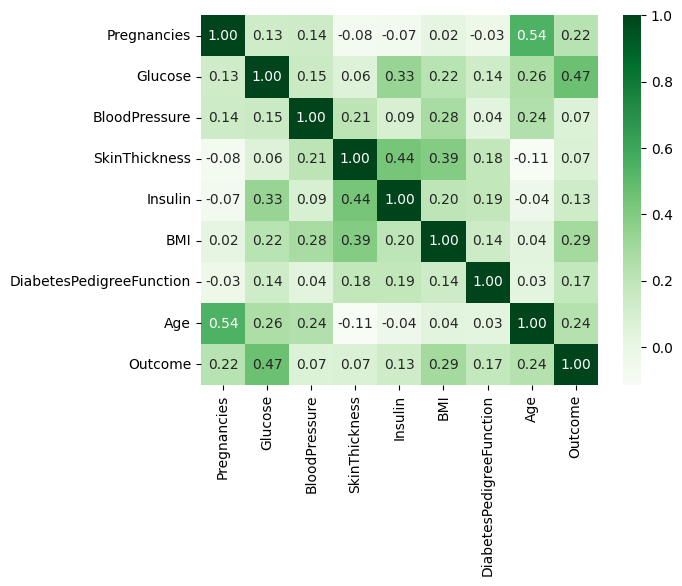

In [88]:
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'Greens')

In [89]:
from sklearn.feature_selection import mutual_info_classif

In [90]:
mic = mutual_info_classif(x,y)

In [95]:
mic = pd.Series(mic)
mic.index = x.columns

In [96]:
mic

Pregnancies                 0.025132
Glucose                     0.124838
BloodPressure               0.000420
SkinThickness               0.000000
Insulin                     0.031709
BMI                         0.077331
DiabetesPedigreeFunction    0.013943
Age                         0.074721
dtype: float64

In [4]:
df = pd.read_csv('heart.csv')

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
x = df.drop(['target'], axis = 1)
y = df['target']

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [24]:
pred = model.predict(x_test)

In [25]:
y_test.values

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9853658536585366

In [35]:
from sklearn.model_selection import GridSearchCV
param_grid = {
   'n_estimators' : [10,20,50],
    'max_depth' : [None, 10,20],
    'min_samples_leaf' : [1,2,3]
}

In [54]:
gs = GridSearchCV(
   estimator = RandomForestClassifier(),
    param_grid = param_grid,
    scoring = 'accuracy',
    cv = 5,
    verbose = 3
)

In [55]:
search = gs.fit(x_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END max_depth=None, min_samples_leaf=1, n_estimators=10;, score=0.982 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=1, n_estimators=10;, score=0.963 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=1, n_estimators=10;, score=0.976 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=1, n_estimators=10;, score=0.976 total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_leaf=1, n_estimators=10;, score=0.915 total time=   0.0s
[CV 1/5] END max_depth=None, min_samples_leaf=1, n_estimators=20;, score=0.994 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=1, n_estimators=20;, score=0.957 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=1, n_estimators=20;, score=0.994 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=1, n_estimators=20;, score=0.994 total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_leaf=1, n_estim

In [40]:
search.best_params_

{'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 20}

In [41]:
model = search.best_estimator_

In [43]:
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=20)

In [44]:
pred = model.predict(x_test)

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9853658536585366

In [56]:
from sklearn.metrics import classification_report

In [58]:
report = classification_report(y_test, pred)

In [59]:
import seaborn as sns

In [62]:
from sklearn.metrics import confusion_matrix

<Axes: >

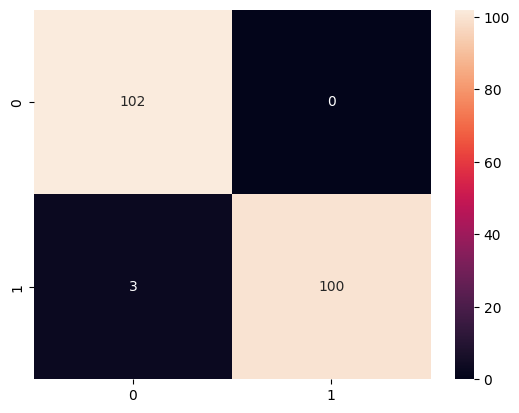

In [65]:
sns.heatmap(confusion_matrix(y_test, pred), fmt = '0.0f', annot = True)

In [46]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
   'n_estimators' : [10,20,50],
    'max_depth' : [None, 10,20],
    'min_samples_leaf' : [1,2,3]
}

In [52]:
rs = RandomizedSearchCV(
   estimator = RandomForestClassifier(),
    param_distributions = param_grid,
    n_iter = 10,
    scoring = 'accuracy',
    cv = 5,
    verbose = 2
)

In [53]:
random_search = rs.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=None, min_samples_leaf=3, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=3, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=3, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=3, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=3, n_estimators=10; total time=   0.0s
[CV] END ..max_depth=20, min_samples_leaf=3, n_estimators=10; total time=   0.0s
[CV] END ..max_depth=20, min_samples_leaf=3, n_estimators=10; total time=   0.0s
[CV] END ..max_depth=20, min_samples_leaf=3, n_estimators=10; total time=   0.0s
[CV] END ..max_depth=20, min_samples_leaf=3, n_estimators=10; total time=   0.0s
[CV] END ..max_depth=20, min_samples_leaf=3, n_estimators=10; total time=   0.0s
[CV] END ..max_depth=20, min_samples_leaf=2, n_estimators=20; total time=   0.0s
[CV] END ..max_depth=20, min_samples_leaf=2, n_e

In [50]:
random_search.best_params_

{'n_estimators': 50, 'min_samples_leaf': 1, 'max_depth': 20}

In [51]:
model = random_search.best_estimator_